In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Линейно-дискриминантный анализ

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25, random_state=123)

In [6]:
lda = LinearDiscriminantAnalysis()

In [7]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [8]:
lda.predict(X_test)

array([2, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0])

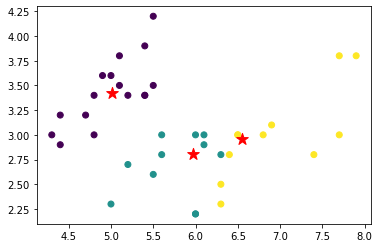

In [9]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# Кластеризация

In [10]:
scaler = StandardScaler()

In [11]:
data_scaled = scaler.fit_transform(data)

In [12]:
k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\79111\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


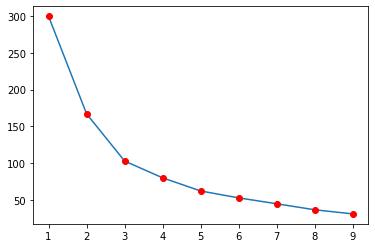

In [13]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')

In [14]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

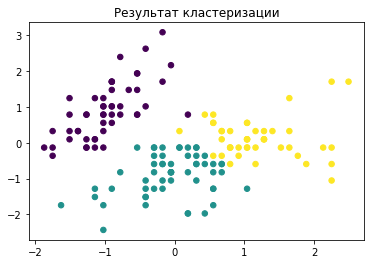

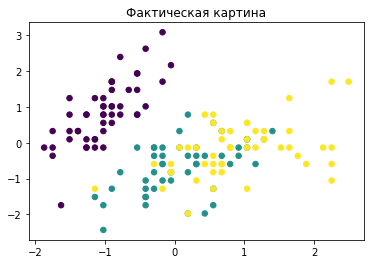

In [15]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, s=30)
plt.title('Результат кластеризации')
plt.show()

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=variety, s=30)
plt.title('Фактическая картина')
plt.show()